# 1. Preparations

In [4]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
OUTPUT_PATH = os.path.join(PROJECT_ROOT_DIR, "output")
os.makedirs(OUTPUT_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(OUTPUT_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
            plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def write_table(table_id, dataframe):
    path = os.path.join(OUTPUT_PATH, table_id + ".tex")
    with open(path, 'w') as f:
        f.write(dataframe.to_latex(index=True))

In [5]:
import wget

PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)

def get_data(urlpath, filepath=""):
    if not filepath:
        file = wget.download(url)
    else:
        file = wget.download(url, out=os.path.join(DATA_PATH, filepath))
    return file

# 2. Strictness of Employment Protection: Individual Dismissals (Regular Contracts)

## Download the data from the OECD database

In [24]:
url = 'https://stats.oecd.org/SDMX-JSON/data/EPL_R/AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+OECD+COL+CRI+LVA+LTU+ALB+ARG+BHS+BRB+BOL+BIH+BRA+CHN+HRV+DOM+ECU+SLV+MKD+GTM+HND+IND+IDN+JAM+KAZ+XKX+MYS+MNE+NIC+PAN+PRY+PER+RUS+SAU+SRB+ZAF+THA+TUN+URY+VEN.EPR_V1+EPR_V3/all?startTime=1990&endTime=2019&pid=aebef3d8-9115-4fcb-b8c8-67eef20e8e2a'
filepath = 'strictness_employment_protection_individual_dismissals_regular_contracts.json'

filename_rc = get_data(url, filepath)
filename_rc

'..\\data\\strictness_employment_protection_individual_dismissals_regular_contracts (1).json'

Let's take a look at the data

In [7]:
import json

with open(filename_rc, 'r') as read_file:
    raw_data = json.load(read_file)

for key, value in raw_data.items():
    print(key, ':', value)
    print('\n\n')

header : {'id': '5b22a56c-28bc-4644-beac-f4c921e08c27', 'test': False, 'prepared': '2020-07-24T16:03:58.4853101Z', 'sender': {'id': 'OECD', 'name': 'Organisation for Economic Co-operation and Development'}, 'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/EPL_R/AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+OECD+COL+CRI+LVA+LTU+ALB+ARG+BHS+BRB+BOL+BIH+BRA+CHN+HRV+DOM+ECU+SLV+MKD+GTM+HND+IND+IDN+JAM+KAZ+XKX+MYS+MNE+NIC+PAN+PRY+PER+RUS+SAU+SRB+ZAF+THA+TUN+URY+VEN.EPR_V1+EPR_V3/all?startTime=1990&endTime=2019&pid=aebef3d8-9115-4fcb-b8c8-67eef20e8e2a', 'rel': 'request'}]}



dataSets : [{'action': 'Information', 'series': {'0:0': {'attributes': [0], 'observations': {'0': [1.166, None], '1': [1.166, None], '2': [1.166, None], '3': [1.166, None], '4': [1.166, None], '5': [1.166, None], '6': [1.166, None], '7': [1.416, None], '8': [1.416, None], '9': [1.416, None], '10': [1.416, None], '11': 

Well, it looks ugly, but we can still extract what we need.

Let's look at the block with country codes.

In [8]:
raw_data['structure']

{'links': [{'href': 'https://stats.oecd.org/SDMX-JSON/dataflow/EPL_R/all',
   'rel': 'dataflow'}],
 'name': 'Strictness of employment protection вЂ“ individual dismissals (regular contracts)',
 'description': 'Strictness of employment protection вЂ“ individual dismissals (regular contracts)',
 'dimensions': {'series': [{'keyPosition': 0,
    'id': 'COUNTRY',
    'name': 'Country',
    'values': [{'id': 'AUS', 'name': 'Australia'},
     {'id': 'AUT', 'name': 'Austria'},
     {'id': 'BEL', 'name': 'Belgium'},
     {'id': 'CAN', 'name': 'Canada'},
     {'id': 'CZE', 'name': 'Czech Republic'},
     {'id': 'DNK', 'name': 'Denmark'},
     {'id': 'FIN', 'name': 'Finland'},
     {'id': 'FRA', 'name': 'France'},
     {'id': 'DEU', 'name': 'Germany'},
     {'id': 'GRC', 'name': 'Greece'},
     {'id': 'HUN', 'name': 'Hungary'},
     {'id': 'ISL', 'name': 'Iceland'},
     {'id': 'IRL', 'name': 'Ireland'},
     {'id': 'ITA', 'name': 'Italy'},
     {'id': 'JPN', 'name': 'Japan'},
     {'id': 'KOR', 

The codes we want are located in Data -> `structure` -> `series` -> `values` and is a list of dictionaries.

Now, let's take a closer look at where our series reside.

In [9]:
raw_data['dataSets']

[{'action': 'Information',
  'series': {'0:0': {'attributes': [0],
    'observations': {'0': [1.166, None],
     '1': [1.166, None],
     '2': [1.166, None],
     '3': [1.166, None],
     '4': [1.166, None],
     '5': [1.166, None],
     '6': [1.166, None],
     '7': [1.416, None],
     '8': [1.416, None],
     '9': [1.416, None],
     '10': [1.416, None],
     '11': [1.416, None],
     '12': [1.416, None],
     '13': [1.416, None],
     '14': [1.416, None],
     '15': [1.416, None],
     '16': [1.416, None],
     '17': [1.166, None],
     '18': [1.166, None],
     '19': [1.166, None],
     '20': [1.666, None],
     '21': [1.666, None],
     '22': [1.666, None],
     '23': [1.666, None],
     '24': [1.666, None],
     '25': [1.666, None],
     '26': [1.666, None],
     '27': [1.666, None],
     '28': [1.666, None],
     '29': [1.666, None]}},
   '1:0': {'attributes': [0],
    'observations': {'0': [2.666, None],
     '1': [2.666, None],
     '2': [2.666, None],
     '3': [2.666, None],

They are stored in Data -> `dataSets` -> `series` and are stored as a nested dictionary.

## Prepare the Data

In [39]:
import json
import pandas as pd

def make_dataframe(filename, country=""):
    """Returns Pandas DataFrame with the data from OECD database
        and a dictionary containing country codes and their names.
    Parameters:
    `filename` (str): a string path to the file;
    `country` (str, list, tuple, dict): country code, given in a 3-letter string
                                        or list/tuple/dictionary of such strings
                                        or 'OECD'.

    Returns:
    pandas DataFrame, dict.
    
    For the API link for the data, please check the OECD STATS database website:
    https://stats.oecd.org/Index.aspx?DataSetCode=EPL_R
    """
    
    with open(filename, 'r') as read_file:
        raw_data = json.load(read_file)

    # get data from dictionaries and lists
    # years
    years_dict = raw_data['structure']['dimensions']['observation'][0]['values']
    years = [int(y['id']) for y in years_dict]
    # country codes
    countries_dict = raw_data['structure']['dimensions']['series'][0]['values']
    country_codes = {c['id']:c['name'] for c in countries_dict}
    # index scores
    scores_dict = {code:raw_data['dataSets'][0]['series'][str(n)+':0']['observations']
                   for n, code in enumerate(country_codes.keys())}
    # want to get rid of the list with `None` entries
    for key, val in scores_dict.items():
        scores_dict[key] = {k:v[0] for k, v in val.items()}
    # finally, let's make a pandas dataframe
    scores_df = pd.DataFrame.from_dict(scores_dict) #.dropna(axis=0, how='all')
    scores_df['year'] = years
    scores_df.set_index('year', inplace=True)
    # if no `country` is given, return full table
    if not country:
        DF = scores_df.rename(columns=country_codes, inplace=True)
    else:  # otherwise, return corresponding columns
        if isinstance(country, str):
            code = country.upper()
            DF = scores_df[code].rename(country_codes[code])
            codes = {code:country_codes[code]}
        elif isinstance(country, (list, tuple, dict)):
            if isinstance(country, dict):
                code = [c.upper() for c in country.keys()]
            else:
                code = [c.upper() for c in country]
            DF = scores_df[code].rename(axis=1, mapper=country_codes)
            codes = {c:country_codes[c] for c in code}
        else:
            print("`country` should be a 3-letter country code, e.g. 'POL' for Poland")
        
    return DF, codes

### Extract Relevant Data

In [40]:
poland_regular_contracts, _ = make_dataframe(filename=filename_rc, country="pol")
poland_regular_contracts

year
1990    2.325
1991    2.325
1992    2.325
1993    2.325
1994    2.325
1995    2.325
1996    2.325
1997    2.325
1998    2.325
1999    2.325
2000    2.325
2001    2.325
2002    2.325
2003    2.325
2004    2.325
2005    2.325
2006    2.325
2007    2.325
2008    2.325
2009    2.325
2010    2.325
2011    2.325
2012    2.325
2013    2.325
2014    2.325
2015    2.325
2016    2.325
2017    2.325
2018    2.325
2019    2.325
Name: Poland, dtype: float64

Export table to LaTeX and save it to a file.

In [9]:
write_table("poland_regular_contracts", poland_regular_contracts)

# 3. Strictness of Employment Protection: Temporary Workers

In [43]:
url = "https://stats.oecd.org/SDMX-JSON/data/EPL_T/AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+OECD+COL+CRI+LVA+LTU+ARG+BHS+BRB+BOL+BRA+CHN+HRV+DOM+ECU+SLV+MKD+GTM+HND+IND+IDN+JAM+MYS+MNE+NIC+PAN+PRY+PER+RUS+SAU+ZAF+THA+TUN+URY+VEN.EPT_V1+EPT_V3/all?startTime=1990&endTime=2019&pid=aebef3d8-9115-4fcb-b8c8-67eef20e8e2a"
filepath = 'strictness_employment_protection_temporary_contracts.json'

filename_tc = get_data(url, filepath)
poland_temporary_contracts, codes = make_dataframe(filename=filename_tc, country="pol")

In [44]:
poland_temporary_contracts.rename("Poland", inplace=True)
poland_temporary_contracts

year
1990    0.625
1991    0.625
1992    0.625
1993    0.625
1994    0.625
1995    0.625
1996    0.625
1997    0.625
1998    0.625
1999    0.625
2000    0.625
2001    0.625
2002    0.625
2003    0.125
2004    1.625
2005    1.625
2006    1.625
2007    1.625
2008    1.625
2009    1.625
2010    1.625
2011    1.625
2012    1.625
2013    1.625
2014    1.625
2015    1.625
2016    1.625
2017    1.625
2018    1.625
2019    1.625
Name: Poland, dtype: float64

In [12]:
write_table("poland_temporary_contracts", poland_temporary_contracts)

### Figure

Saving figure hiring_regulation_temporary_workers_vs_dismissal_regulation_regular_workers_EPL_Index_2019


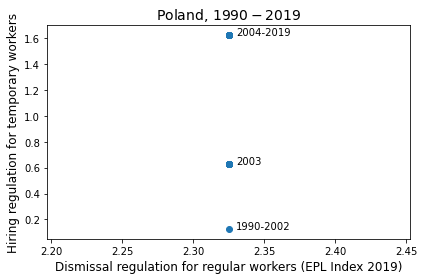

In [45]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(poland_regular_contracts, poland_temporary_contracts)
plt.title("Poland, $1990-2019$", fontsize=14)
plt.ylabel("Hiring regulation for temporary workers", fontsize=12)
plt.xlabel("Dismissal regulation for regular workers (EPL Index 2019)", fontsize=12)

points = set(zip(["2003", "1990-2002", "2004-2019"], set(zip(poland_regular_contracts, poland_temporary_contracts))))
for label, coord in points:
    plt.annotate(label,
        xy=np.array(coord) + np.array((.005, 0.)),
        xytext=np.array(coord) + np.array((.005, 0.))
    )

save_fig("hiring_regulation_temporary_workers_vs_dismissal_regulation_regular_workers_EPL_Index_2019")

### Cross-correlation and Pierson correlation coefficients

In [46]:
import numpy as np

np.corrcoef(poland_regular_contracts, poland_temporary_contracts)

array([[ 1.00000000e+00, -1.12969723e-16],
       [-1.12969723e-16,  1.00000000e+00]])

In [47]:
np.correlate(poland_regular_contracts, poland_temporary_contracts)

array([79.63125])

# 4. Robustness / Validation Check

I find it strange that the Strictness of Employment Protection: Individual Dismissals (Regular Contracts) does not vary for Poland for 30 years...
So I looked up the OECD website and found the data from earlier reports, now in Excel format.
Let's look if it can give us other insights.

In [17]:
url = "https://www.oecd.org/employment/emp/Updated time series.xls"
filepath = 'strictness_employment_protection_individual_dismissals_regular_contracts_2009.xls'

filename_rc_2009 = get_data(url, filepath)

poland_regular_contracts_2009 = pd.read_excel(filename_rc_2009, sheet_name="Level 2 - Sub-indicators")
poland_regular_contracts_2009.loc[poland_regular_contracts_2009.ctry=="POL"]

,country,ctry,year,EPR_v1,EPR_v3,EPT_v1,EPT_v3,EPC
577,Poland,POL,1985,NaN,NaN,NaN,NaN,NaN
578,Poland,POL,1986,NaN,NaN,NaN,NaN,NaN
579,Poland,POL,1987,NaN,NaN,NaN,NaN,NaN
580,Poland,POL,1988,NaN,NaN,NaN,NaN,NaN
581,Poland,POL,1989,NaN,NaN,NaN,NaN,NaN
582,Poland,POL,1990,2.06,NaN,0.75,NaN,NaN
583,Poland,POL,1991,2.06,NaN,0.75,NaN,NaN
584,Poland,POL,1992,2.06,NaN,0.75,NaN,NaN
585,Poland,POL,1993,2.06,NaN,0.75,NaN,NaN
586,Poland,POL,1994,2.06,NaN,0.75,NaN,NaN


As we can see, `EPR_V1` does not vary over time...

# 5. Let's Play

In [36]:
make_dataframe(filename=filename_rc)

,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,NIC,PAN,PRY,PER,SRB,THA,TUN,URY,VEN,KAZ
year,,,,,,,,,,,,,,,,,,,,,
1990,1.166,2.666,1.638,0.587,NaN,1.515,2.702,2.515,2.500,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,1.166,2.666,1.638,0.587,NaN,1.515,2.702,2.515,2.500,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,1.166,2.666,1.638,0.587,NaN,1.515,2.369,2.515,2.500,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,1.166,2.666,1.638,0.587,3.638,1.515,2.369,2.515,2.500,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1.166,2.666,1.638,0.587,3.638,1.515,2.369,2.515,2.595,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1.166,2.666,1.638,0.587,3.638,1.468,2.369,2.515,2.595,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,1.166,2.666,1.638,0.587,3.638,1.468,2.369,2.515,2.595,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1.416,2.666,1.638,0.587,3.638,1.468,2.226,2.515,2.595,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1.416,2.666,1.638,0.587,3.638,1.468,2.226,2.515,2.595,3.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
import numpy as np
import matplotlib.pyplot as plt

countries = [
    'rus', 'deu', 'dnk', 'cze', 'fin', 'fra', 'grc',
    'nor', 'pol', 'ita', 'swe', 'esp', 'gbr', 'tur',
    'chn', 'ind', 'jpn', 'usa', 'can', 'aut', 'arg', 'bra',
]

regular_contracts, codes = make_dataframe(filename=filename_rc, country=countries)
temporary_contracts, _ = make_dataframe(filename=filename_tc, country=countries)

print(codes)

def bold_nan(x):
    """Makes background grey if the entry is `NaN`."""
    return 'background-color: grey' if pd.isnull(x) else ''
regular_contracts.style.applymap(bold_nan)

{'RUS': 'Russian Federation', 'DEU': 'Germany', 'DNK': 'Denmark', 'CZE': 'Czech Republic', 'FIN': 'Finland', 'FRA': 'France', 'GRC': 'Greece', 'NOR': 'Norway', 'POL': 'Poland', 'ITA': 'Italy', 'SWE': 'Sweden', 'ESP': 'Spain', 'GBR': 'United Kingdom', 'TUR': 'Turkey', 'CHN': 'China', 'IND': 'India', 'JPN': 'Japan', 'USA': 'United States', 'CAN': 'Canada', 'AUT': 'Austria', 'ARG': 'Argentina', 'BRA': 'Brazil'}


,Russian Federation,Germany,Denmark,Czech Republic,Finland,France,Greece,Norway,Poland,Italy,Sweden,Spain,United Kingdom,Turkey,China,India,Japan,United States,Canada,Austria,Argentina,Brazil
year,,,,,,,,,,,,,,,,,,,,,,
1990,nan,2.500000,1.515000,nan,2.702000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,3.547000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1991,nan,2.500000,1.515000,nan,2.702000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,3.547000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1992,nan,2.500000,1.515000,nan,2.369000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,3.547000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1993,nan,2.500000,1.515000,3.638000,2.369000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,3.547000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1994,nan,2.595000,1.515000,3.638000,2.369000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,3.547000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1995,nan,2.595000,1.468000,3.638000,2.369000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,2.357000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1996,nan,2.595000,1.468000,3.638000,2.369000,2.515000,3.134000,2.333000,2.325000,3.015000,2.636000,2.357000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1997,nan,2.595000,1.468000,3.638000,2.226000,2.515000,3.134000,2.333000,2.325000,3.015000,2.541000,2.357000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan
1998,nan,2.595000,1.468000,3.638000,2.226000,2.515000,3.134000,2.333000,2.325000,3.015000,2.541000,2.357000,1.345000,3.059000,nan,nan,1.702000,0.093000,0.587000,2.666000,nan,nan


{'RUS': 'Russian Federation', 'DEU': 'Germany', 'DNK': 'Denmark', 'CZE': 'Czech Republic', 'FIN': 'Finland', 'FRA': 'France', 'GRC': 'Greece', 'NOR': 'Norway', 'POL': 'Poland', 'ITA': 'Italy', 'SWE': 'Sweden', 'ESP': 'Spain', 'GBR': 'United Kingdom', 'TUR': 'Turkey', 'CHN': 'China', 'IND': 'India', 'JPN': 'Japan', 'USA': 'United States', 'CAN': 'Canada', 'AUT': 'Austria', 'ARG': 'Argentina', 'BRA': 'Brazil'}


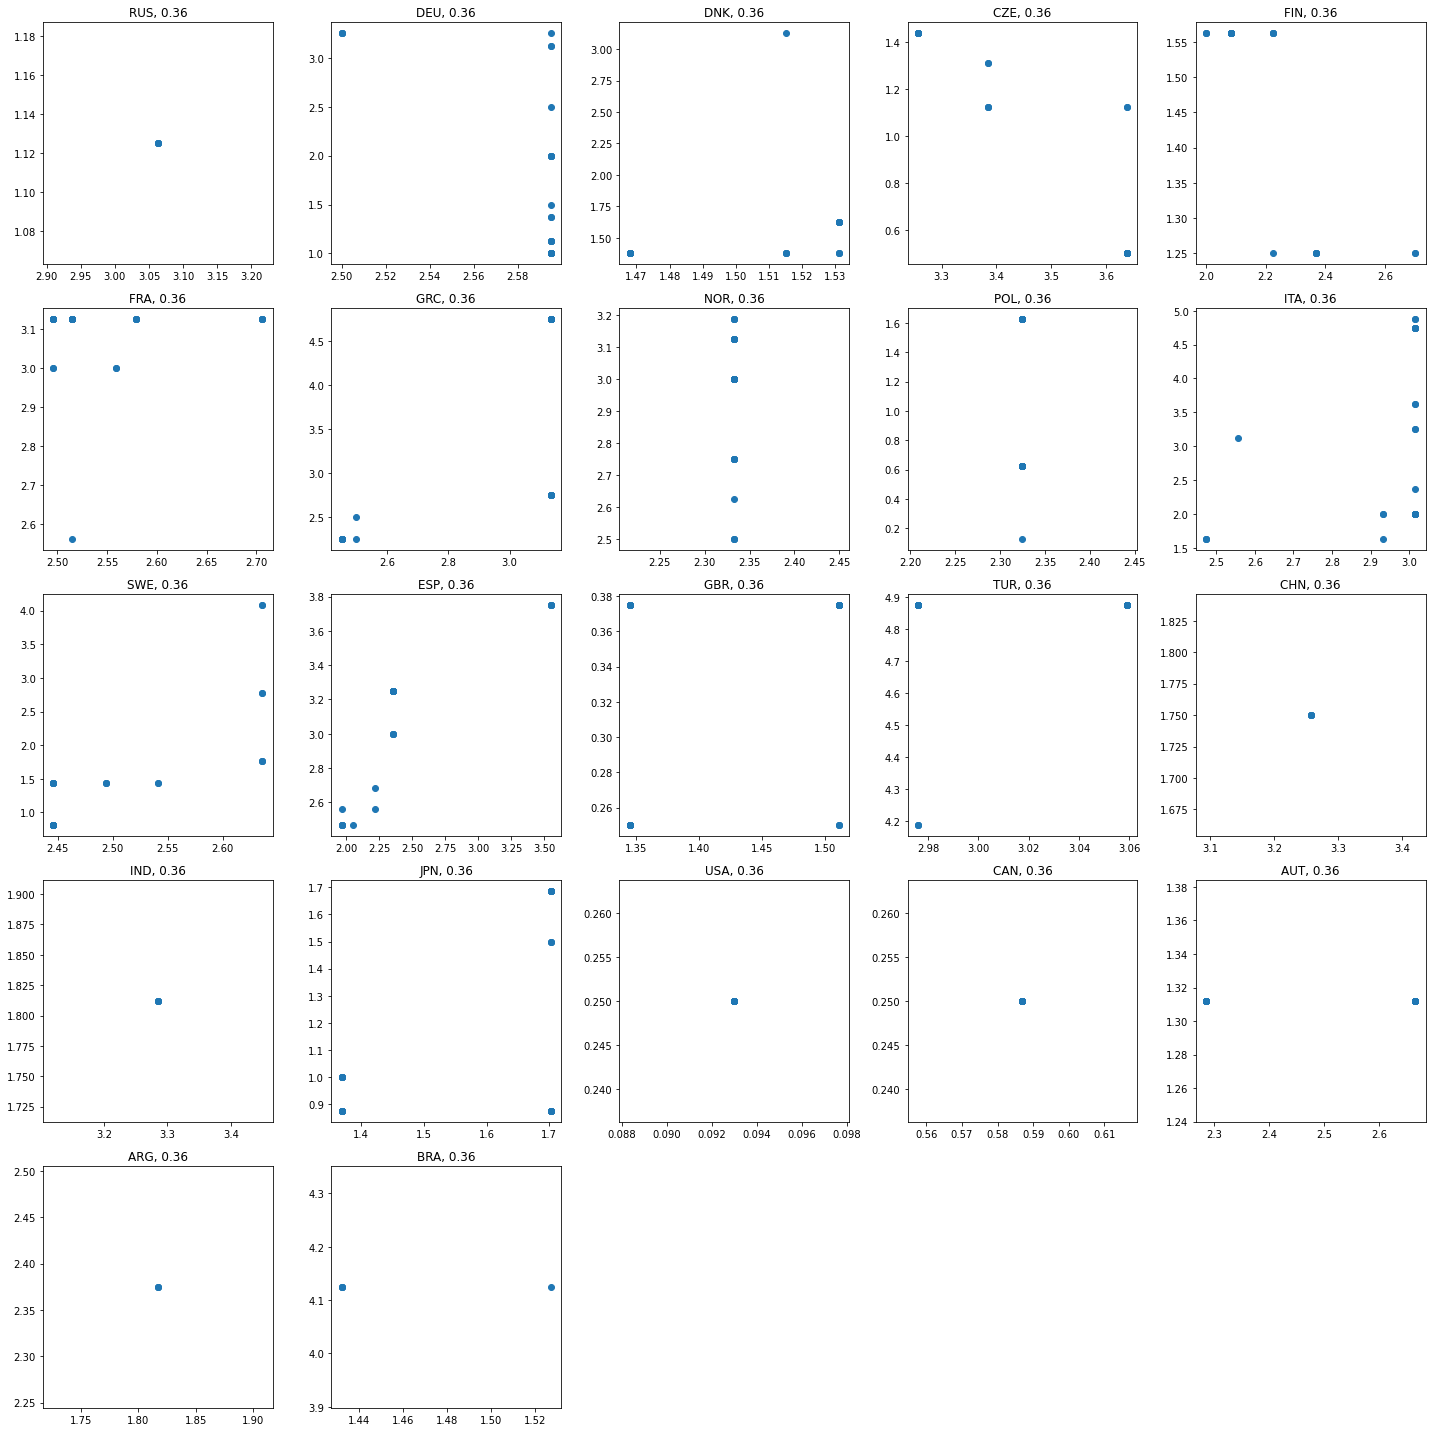

In [50]:
n_cols = 5
n_rows = (len(countries)-1) // n_cols + 1
plt.figure(figsize=(20, 20))
for n, country in enumerate(countries):
    corr = np.corrcoef(regular_contracts.dropna(), temporary_contracts.dropna())
    plt.subplot(n_rows, n_cols, n+1)
    plt.scatter(regular_contracts[codes[country.upper()]],
                temporary_contracts[codes[country.upper()]])
    plt.title(country.upper()+f", {corr[0,1]:.2}")
#     plt.ylabel("Hiring regulation for temporary workers", fontsize=12)
#     plt.xlabel("Dismissal regulation for regular workers", fontsize=12)
    plt.tight_layout()

Several countries demonstrate positive correlation between 'Hiring regulation for temporary workers' and 'Dismissal regulation for regular workers' over time.

In the future, I will explore whether a positive cross-country correlation changed over past 30 years.